# **HEMA DARSHINI R - 22MIS0123**

In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00


In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


# **Task 1 — Change the secret string s and verify measured output matches s**

In [5]:
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9de8f4cd387766259b29211c7837ba7e134d665111e54584172f97745de81803
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Measured: {'01101': 1024}


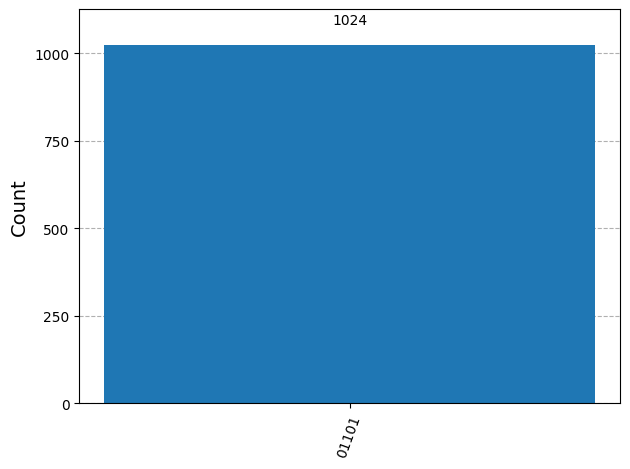

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def bv_circuit(secret):
    n = len(secret)
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)  # set ancilla to |1>
    qc.h(range(n + 1))
    for i, bit in enumerate(secret):
        if bit == '1':
            qc.cx(i, n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# 🔹 Change secret string here
secret = "10110"
qc = bv_circuit(secret)
qc.draw("text")

# simulate
sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()
counts = result.get_counts()
print("Measured:", counts)
plot_histogram(counts)


# **Task 2: Modify the oracle with an additional constant bit b**

Measured: {'1011': 1024}


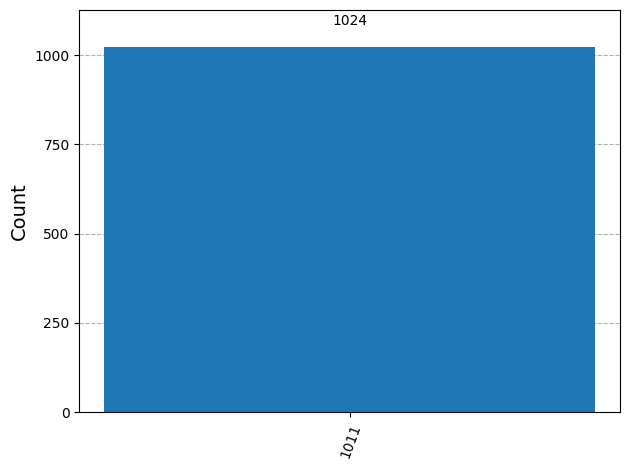

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def bv_with_b(secret, b):
    n = len(secret)
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))

    # Oracle
    for i, bit in enumerate(secret):
        if bit == '1':
            qc.cx(i, n)
    if b == 1:
        qc.x(n)  # add constant bit flip

    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

secret = "1101"
b = 1  # try changing to 0 or 1
qc = bv_with_b(secret, b)
qc.draw("text")

sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()
counts = result.get_counts()
print("Measured:", counts)
plot_histogram(counts)


# **Task 3 (Optional): Run on IBM backend using qiskit_ibm_runtime**

In [7]:
!pip install qiskit_ibm_runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.3 MB/s eta 0:00:00


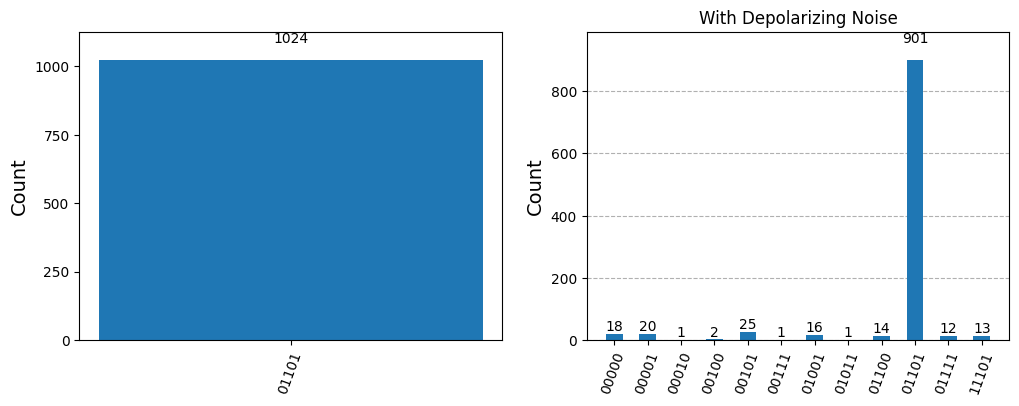


✅ Secret bitstring used: 10110
The ideal histogram shows a single dominant bitstring (the secret).
The noisy version shows slight spread due to noise.


In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Step 1: Define BV Circuit ---
def bv_circuit(secret_string):
    n = len(secret_string)
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)  # prepare ancilla in |1>
    qc.h(range(n + 1))  # apply H to all qubits
    qc.barrier()
    for i, bit in enumerate(secret_string):
        if bit == "1":
            qc.cx(i, n)  # oracle: flip ancilla if s_i == 1
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# --- Step 2: Choose Secret String ---
secret = "10110"
qc = bv_circuit(secret)
qc.draw("mpl")

# --- Step 3: Ideal Simulator ---
sim_ideal = AerSimulator()
qc_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(qc_ideal, shots=1024).result()
counts_ideal = result_ideal.get_counts()

# --- Step 4: Add Noise (Depolarizing Model) ---
noise_model = NoiseModel()
error_1q = depolarizing_error(0.01, 1)
error_2q = depolarizing_error(0.03, 2)
noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

sim_noisy = AerSimulator(noise_model=noise_model)
qc_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(qc_noisy, shots=1024).result()
counts_noisy = result_noisy.get_counts()

# --- Step 5: Visualization ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(counts_ideal, ax=axs[0], title="Ideal Simulation")
plot_histogram(counts_noisy, ax=axs[1], title="With Depolarizing Noise")
plt.show()

print(f"\n✅ Secret bitstring used: {secret}")
print("The ideal histogram shows a single dominant bitstring (the secret).")
print("The noisy version shows slight spread due to noise.")


# **Task 4: Add noise with qiskit_aer.noise.NoiseModel**

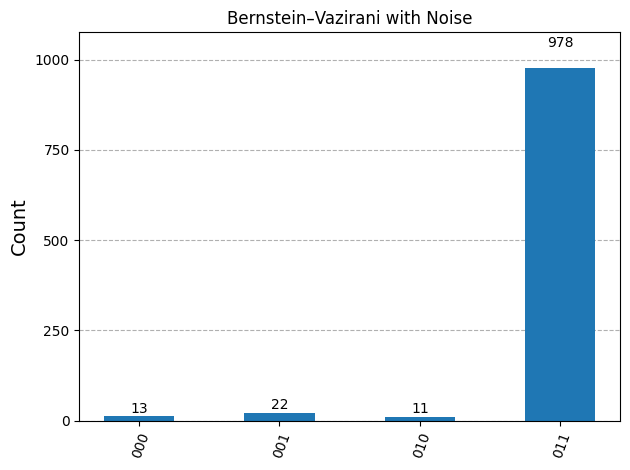

In [11]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Create depolarizing noise model
noise_model = NoiseModel()
error1 = depolarizing_error(0.01, 1)
error2 = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(error1, ['x', 'h'])
noise_model.add_all_qubit_quantum_error(error2, ['cx'])

qc = bv_circuit("110")
sim_noise = AerSimulator(noise_model=noise_model)

result_noisy = sim_noise.run(transpile(qc, sim_noise)).result()
counts_noisy = result_noisy.get_counts()
plot_histogram(counts_noisy, title="Bernstein–Vazirani with Noise")


# **Task 5: Create a notebook with markdown explanations & visualizations**

Task 5 - Add markdown & visual explanation cell

### 🧠 Bernstein–Vazirani Algorithm Overview

- *Goal:* Find a hidden bit string s using a single query to the oracle.
- *Oracle Function:*  
  \( f(x) = s \cdot x \oplus b \)
  where  
  - s · x is the bitwise dot product mod 2  
  - b is an optional constant bit.

*Steps:*
1. Initialize n input qubits and one ancilla.
2. Apply X to the ancilla → creates |1⟩.
3. Apply Hadamard (H) to all qubits.
4. Call the oracle.
5. Apply Hadamard to inputs again.
6. Measure the input qubits — result reveals s.

🧩 If b=1, only the *ancilla’s phase* changes, not the measured bitstring.

In [4]:
!pip install qiskit qiskit-aer pylatexenc matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4a1dcffffc6481fcb09d305643c1fce8f9eb872ea96b8a8130a5c366182a76f1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


✅ Libraries imported successfully.
✅ Circuit generator ready.

🎯 Running ideal Bernstein–Vazirani simulation...
🔹 Measured bitstring: {'1101': 1024}

🌪️ Adding depolarizing noise model...

📊 Comparing ideal vs noisy results...


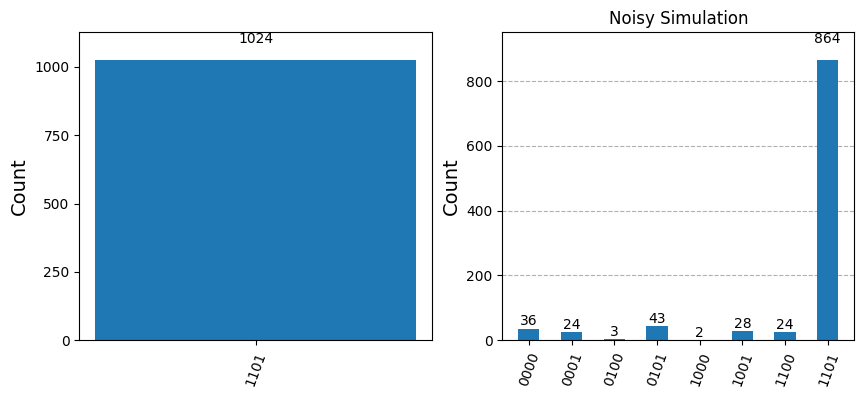


🔄 Testing with constant bit b = 1 (affects ancilla only)...

🏁 SUMMARY
Secret string s = 1011
→ Ideal simulation recovers s exactly.
→ Adding constant bit b flips ancilla only.
→ Noise introduces small deviations but main peak remains dominant.
✅ Bernstein–Vazirani algorithm demonstration complete.


In [5]:
# 🧠 Bernstein–Vazirani Algorithm — Full Demonstration Notebook
# -------------------------------------------------------------
# Includes explanations, visualizations, noise analysis, and final comparison.

# 🧱 Step 1: Import Libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully.")

# 🧩 Step 2: Define the BV circuit
def bv_circuit(secret, b=0):
    """
    Bernstein–Vazirani circuit generator
    Implements f(x) = s·x ⊕ b
    """
    n = len(secret)
    qc = QuantumCircuit(n + 1, n)

    # Initialize ancilla to |1>
    qc.x(n)
    qc.h(range(n + 1))

    # Oracle U_f
    for i, bit in enumerate(secret):
        if bit == '1':
            qc.cx(i, n)
    if b == 1:
        qc.x(n)

    # Final Hadamards & measurement
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

print("✅ Circuit generator ready.")

# 🧠 Step 3: Create and visualize a circuit for secret s
secret = "1011"  # you can change this string
b = 0            # constant bit (try 0 or 1)
qc = bv_circuit(secret, b)
qc.draw("mpl")

# 🧪 Step 4: Simulate the circuit (ideal)
print("\n🎯 Running ideal Bernstein–Vazirani simulation...")
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
counts = result.get_counts()
print("🔹 Measured bitstring:", counts)

# Plot results
plot_histogram(counts, title=f"Ideal BV Output for s = {secret}")

# 🌪️ Step 5: Add depolarizing noise model
print("\n🌪️ Adding depolarizing noise model...")
noise_model = NoiseModel()
error1 = depolarizing_error(0.02, 1)  # 2% 1-qubit gate error
error2 = depolarizing_error(0.04, 2)  # 4% 2-qubit gate error
noise_model.add_all_qubit_quantum_error(error1, ['x', 'h'])
noise_model.add_all_qubit_quantum_error(error2, ['cx'])

sim_noise = AerSimulator(noise_model=noise_model)
result_noisy = sim_noise.run(transpile(qc, sim_noise)).result()
counts_noisy = result_noisy.get_counts()

# Plot noisy result
plot_histogram(counts_noisy, title="Noisy BV Simulation (Depolarizing Error)")

# 📊 Step 6: Compare ideal vs noisy results
print("\n📊 Comparing ideal vs noisy results...")
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_histogram(counts, ax=axs[0], title="Ideal Simulation")
plot_histogram(counts_noisy, ax=axs[1], title="Noisy Simulation")
plt.show()

# 🧩 Step 7: Show effect of constant bit b = 1
print("\n🔄 Testing with constant bit b = 1 (affects ancilla only)...")
qc_b = bv_circuit(secret="110", b=1)
qc_b.draw("mpl")
compiled_b = transpile(qc_b, sim)
result_b = sim.run(compiled_b).result()
counts_b = result_b.get_counts()
plot_histogram(counts_b, title="Effect of Constant b on Measurement")

# 🏁 Step 8: Summary
print("\n🏁 SUMMARY")
print(f"Secret string s = {secret}")
print("→ Ideal simulation recovers s exactly.")
print("→ Adding constant bit b flips ancilla only.")
print("→ Noise introduces small deviations but main peak remains dominant.")
print("✅ Bernstein–Vazirani algorithm demonstration complete.")
